In [ ]:
!zip -r data.zip data

	zip warning: name not matched: data

zip error: Nothing to do! (try: zip -r data.zip . -i data)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

URL='https://vnexpress.net'

In [ ]:
def get_links(url):
  links=[]
  html=urlopen(url).read()
  soup=BeautifulSoup(html,'html.parser')

  urls=set(re.findall(r'(?:http|https|ftp):\/\/(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])',str(soup)))

  for url in urls:
    if url != URL and url.startswith(URL) and not url.startswith(URL + '/tac-gia') and url.endswith('.html'):
      links.append(url)
  return links

In [ ]:
get_links(URL)

['https://vnexpress.net/chang-trai-viet-day-nguoi-dan-chau-phi-trong-lua-nuoc-4753859.html',
 'https://vnexpress.net/cuoc-dau-mot-mat-mot-con-giua-ten-hag-va-sancho-4753911.html',
 'https://vnexpress.net/cuoc-cai-va-voi-chi-dau-gop-phan-khien-con-trai-ong-biden-hau-toa-4753573.html',
 'https://vnexpress.net/bo-truong-tai-nguyen-va-moi-truong-dang-quoc-khanh-tra-loi-chat-van-4753965.html',
 'https://vnexpress.net/cho-hang-gio-mua-vang-binh-on-4753823.html',
 'https://vnexpress.net/ung-vien-thu-tuong-anh-tuyen-bo-san-sang-dung-vu-khi-hat-nhan-4754032.html',
 'https://vnexpress.net/ong-thich-minh-tue-dung-di-bo-khat-thuc-4753717.html',
 'https://vnexpress.net/ly-do-khien-khach-trung-quoc-den-viet-nam-nhieu-nhat-thang-5-4753661.html',
 'https://vnexpress.net/am-muu-thu-tieu-bo-nhi-10-nam-cua-quan-chuc-ngoai-tinh-4753923.html',
 'https://vnexpress.net/nghi-luc-song-cua-chang-trai-tung-lao-vao-bien-lua-cuu-me-4752439.html',
 'https://vnexpress.net/my-neu-ly-do-nga-mat-da-tien-o-kharkov-47539

In [ ]:
get_links(URL)
categories=['khoa-hoc','giai-tri','the-thao','kinh-doanh','suc-khoe']

article_url={}

for category in categories:
  article_url[category]=[]

  for i in range(1,11):
    url='{}/{}-p{}'.format(URL,category,str(i))
    article_url[category]+= get_links(url)

  article_url[category]=list(set(article_url[category][:100]))
  print(category,len(article_url[category]))

  goc_nhin=['binh-luan-nhieu','covid-19','chinh-tri-chinh-sach','y-te-suc-khoe','kinh-doanh-quan-tri','giao-duc-tri-thuc','van-hoa-loi-song']
  article_url['goc-nhin']=[]

  for sub_cate in goc_nhin:
    url='{}/{}/{}'.format(URL,'goc-nhin',sub_cate)
    article_url['goc-nhin'] +=get_links(url)

article_url['goc-nhin']= list(set(article_url['goc-nhin'][:50]))
print('goc-nhin',len(article_url['goc-nhin']))


khoa-hoc 100
giai-tri 100
the-thao 100
kinh-doanh 100
suc-khoe 100
goc-nhin 47


In [ ]:
def get_content(url):
  content=''
  html=urlopen(url).read()
  soup=BeautifulSoup(html,'html.parser')

  div_content= soup.select('.page-detail .container')
  if len(div_content) > 0:
    div_content= div_content[0]

    description= div_content.find_all('p',{'class': 'description'})
    if len(description)>0:
      description=description[-1]
      text_description=description.get_text()
      location=description.find('span',{'class': 'location-stamp'})
      if location is not None:
        content=text_description[len(location.get_text()):]
      else:
        content = text_description

    detail= div_content.find('article',{'class': 'fck_detail'})
    if detail is not None:
      p_normal= detail.find_all('p',{'class':'Normal'})
      if len(p_normal) >0:
        for p in p_normal:
          p_text=p.get_text()
          if p_text !='' and not p_text.startswith('>>') and p_text[-1] in ['.','!','?']:
            content+=' ' + p.get_text()
  return re.sub(r'\n','',content)

In [ ]:
get_content(article_url['khoa-hoc'][0])

'Camera kỹ thuật số nặng 3 tấn vượt qua hành trình bằng máy bay và xe tải để tới đài quan sát trên đỉnh núi cao hơn 2.700 m an toàn. Sau hai thập kỷ phát triển, camera trung tâm của Đài quan sát Vera C. Rubin tương lai đã tới ngôi nhà của nó vào tuần trước. Hiện nay, camera đang nằm trên đỉnh núi Cerro Pachón ở Chile. Camera này là phần quan trọng cuối cùng của Kính viễn vọng khảo sát Simonyi thuộc Đài quan sát Rubin. Tại đó, thiết bị sẽ được lắp đặt sau vài tháng kiểm tra kỹ lưỡng. Vận chuyển an toàn và thành công camera lớn cỡ chiếc SUV từ nơi chế tạo là Phòng thí nghiệm gia tốc quốc gia SLAC ở California tới vị trí trên đỉnh núi thuộc dãy Andes, Chile là một thành tựu không hề nhỏ, theo Space. Đây là camera lớn nhất từng được chế tạo cho thiên văn học, nặng 3 tấn và có bề rộng 1,5 m. Vì vậy, để giảm thiểu rủi ro đối với thiết bị trị giá 168 triệu USD, các nhà khoa học và kỹ sư thực hiện một đợt tổng duyệt vào năm 2021 khi vận chuyển bản mô phỏng có khối lượng tương đương tới Chile. 

In [ ]:
uppercase = (
    "AÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬ"
    "B"
    "C"
    "DĐ"
    "EÉÈẺẼẸÊẾỀỂỄỆ"
    "G"
    "H"
    "IÍÌỈĨỊ"
    "K"
    "L"
    "M"
    "NÓÒỎÕỌỐỒỔỖỘỜỚỞỠỢ"
    "OÓÒỎÕỌỐỒỔỖỘỜỚỞỠỢ"
    "ÔỐỒỔỖỘỜỚỞỠỢ"
    "ƠỚỜỞỠỢ"
    "P"
    "Q"
    "R"
    "S"
    "T"
    "UÚÙỦŨỤỨỪỬỮỰƯ"
    "V"
    "X"
    "YÝỲỶỸỴ"
    "W"
    "Z"
)


uppercase_string = ''.join(uppercase)
print(uppercase_string)

AÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬBCDĐEÉÈẺẼẸÊẾỀỂỄỆGHIÍÌỈĨỊKLMNÓÒỎÕỌỐỒỔỖỘỜỚỞỠỢOÓÒỎÕỌỐỒỔỖỘỜỚỞỠỢÔỐỒỔỖỘỜỚỞỠỢƠỚỜỞỠỢPQRSTUÚÙỦŨỤỨỪỬỮỰƯVXYÝỲỶỸỴWZ


In [ ]:
import os.path
from os import path
if path.exists('/content/drive/MyDrive/data/categories/') == False:
  !mkdir /content/drive/MyDrive/data/categories/

In [ ]:
import os
import shutil
def delete_files_in_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            os.remove(os.path.join(root, file))
        for dir in dirs:
            shutil.rmtree(os.path.join(root, dir))

# Thay đổi đường dẫn của thư mục mà bạn muốn xóa các tệp
folder_path = "/content/drive/MyDrive/data/categories/"
delete_files_in_folder(folder_path)
sentence=[]

uppercase='AÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬBCDĐEÉÈẺẼẸÊẾỀỂỄỆGHIÍÌỈĨỊKLMNÓÒỎÕỌỐỒỔỖỘỜỚỞỠỢOÓÒỎÕỌỐỒỔỖỘỜỚỞỠỢÔỐỒỔỖỘỜỚỞỠỢƠỚỜỞỠỢPQRSTUÚÙỦŨỤỨỪỬỮỰƯVXYÝỲỶỸỴWZ'

for category in article_url.keys():
  current_path='/content/drive/MyDrive/data/categories/' + category +'/'
  os.mkdir(current_path)

  count=0
  for i in range(len(article_url[category])):
    content=get_content(article_url[category][i])
    if content !='':
      count+=1
      f=open('{}/{}_{}.txt'.format(current_path,category,str(count)), 'w', encoding='utf-8')

      lines=re.sub(r'(?<=[.?!])(?=[\'"`]*['+ uppercase +'-])',' ',content)

      lines=re.split(r'(?<=[.?!])\s+(?=[\'"`"'']*['+ uppercase +'0-9-])',content )

      for line in lines:
        f.write(line + '\n')
        sentence.append(line)
      f.close()

  print(category,count)

sentence=list(set(sentence))
print('tổng số câu tách được:',len(sentence))

khoa-hoc 100
goc-nhin 47
giai-tri 100
the-thao 100
kinh-doanh 99
suc-khoe 100
tổng số câu tách được: 13173


In [ ]:
sentence[:10]

['Và thế là chúng tôi ngồi đợi cậu ấy đến".',
 'Chóng mặt kịch phát tư thế lành tính (BPPV) là bệnh phổ biến, thường gặp ở nữ.',
 'Dễ làm, dễ được chấp nhận khiến ổ bánh mì cũng dễ lọt qua mọi quy chuẩn giám sát về an toàn thực phẩm.',
 'Tuy nhiên, mức chênh lệch giữa giá vàng miếng SJC trong nước và giá vàng thế giới vẫn ở mức cao, khoảng trên 20%.',
 'Anh vẫn khóc rung cả người dù cố gắng kìm nén.',
 'Hendricks còn mua và cải tạo nhiều tòa nhà lịch sử, doanh nghiệp lâu đời của thị trấn.',
 'Đây là lúc nồng độ testosterone ở mức cao nhất.',
 'Tháng 2, Sun Life Việt Nam tăng vốn điều lệ từ 16.480 tỷ đồng lên 17.944 tỷ đồng.',
 'Tập thể dục thường xuyên giúp giảm mức chất béo trung tính và tăng cholesterol HDL, cả hai đều tốt cho trái tim.',
 'Tôi cố gắng học hỏi đồng đội, gia đình bên nội và càng ngày học được nhiều điều.']

In [ ]:
file_corpus=open('/content/drive/MyDrive/data/corpus.txt','w',encoding='utf-8')

count=0

for sent in sentence:
  sent=re.sub(r'\u200b','',sent)
  file_corpus.write(sent.strip()+'\n')
  count+=1
file_corpus.close()

print('so luong cau trong file ngu lieu:',count)

so luong cau trong file ngu lieu: 13173


In [ ]:
f = open('/content/drive/MyDrive/data/corpus.txt','r',encoding='utf-8')
data = [line[:-1] for line in f.readlines()]
f.close()

print('so cau du lieu',len(data))

so cau du lieu 13173


In [ ]:
data[:10]

['Và thế là chúng tôi ngồi đợi cậu ấy đến".',
 'Chóng mặt kịch phát tư thế lành tính (BPPV) là bệnh phổ biến, thường gặp ở nữ.',
 'Dễ làm, dễ được chấp nhận khiến ổ bánh mì cũng dễ lọt qua mọi quy chuẩn giám sát về an toàn thực phẩm.',
 'Tuy nhiên, mức chênh lệch giữa giá vàng miếng SJC trong nước và giá vàng thế giới vẫn ở mức cao, khoảng trên 20%.',
 'Anh vẫn khóc rung cả người dù cố gắng kìm nén.',
 'Hendricks còn mua và cải tạo nhiều tòa nhà lịch sử, doanh nghiệp lâu đời của thị trấn.',
 'Đây là lúc nồng độ testosterone ở mức cao nhất.',
 'Tháng 2, Sun Life Việt Nam tăng vốn điều lệ từ 16.480 tỷ đồng lên 17.944 tỷ đồng.',
 'Tập thể dục thường xuyên giúp giảm mức chất béo trung tính và tăng cholesterol HDL, cả hai đều tốt cho trái tim.',
 'Tôi cố gắng học hỏi đồng đội, gia đình bên nội và càng ngày học được nhiều điều.']

In [ ]:
vowel = list("aăâeêioôơuưyAĂÂEÊIOÔƠUƯYáàảãạắằẳẵặấầẩẫậéèẻẽẹếềểễệíìỉĩịóòỏõọốồổỗộớờởỡợúùủũụứừửữựýỳỷỹỵÁÀẢÃẠẮẰẲẴẶẤẦẨẪẬÉÈẺẼẸẾỀỂỄỆÍÌỈĨỊÓÒỎÕỌỐỒỔỖỘỚỜỞỠỢÚÙỦŨỤỨỪỬỮỰÝỲỶỸỴ")
consonants = list("bcdđghklmnpqrstvxBCDĐGHKLMNPQRSTVX")
full_letters=vowel + consonants
print(vowel)

typo = {
    'á': 'a\'',
    'à': 'a`',
    'ả': 'a?',
    'ã': 'a~',
    'ạ': 'a.',
    'ă': 'aw',
    'ắ': 'aw\'',
    'ằ': 'aw`',
    'ẳ': 'aw?',
    'ẵ': 'aw~',
    'ặ': 'aw.',
    'â': 'aa',
    'ấ': 'aa\'',
    'ầ': 'aa`',
    'ẩ': 'aa?',
    'ẫ': 'aa~',
    'ậ': 'aa.',
    'é': 'e\'',
    'è': 'e`',
    'ẻ': 'e?',
    'ẽ': 'e~',
    'ẹ': 'e.',
    'ê': 'ee',
    'ế': 'ee\'',
    'ề': 'ee`',
    'ể': 'ee?',
    'ễ': 'ee~',
    'ệ': 'ee.',
    'í': 'i\'',
    'ì': 'i`',
    'ỉ': 'i?',
    'ĩ': 'i~',
    'ị': 'i.',
    'ó': 'o\'',
    'ò': 'o`',
    'ỏ': 'o?',
    'õ': 'o~',
    'ọ': 'o.',
    'ô': 'oo',
    'ố': 'oo\'',
    'ồ': 'oo`',
    'ổ': 'oo?',
    'ỗ': 'oo~',
    'ộ': 'oo.',
    'ơ': 'ow',
    'ớ': 'ow\'',
    'ờ': 'ow`',
    'ở': 'ow?',
    'ỡ': 'ow~',
    'ợ': 'ow.',
    'ú': 'u\'',
    'ù': 'u`',
    'ủ': 'u?',
    'ũ': 'u~',
    'ụ': 'u.',
    'ư': 'uw',
    'ứ': 'uw\'',
    'ừ': 'uw`',
    'ử': 'uw?',
    'ữ': 'uw~',
    'ự': 'uw.',
    'ý': 'y\'',
    'ỳ': 'y`',
    'ỷ': 'y?',
    'ỹ': 'y~',
    'ỵ': 'y.'
}
region = {
    'á': 'ã',
    'à': 'ạ',
    'ả': 'ã',
    'ã': 'ả',
    'ạ': 'à',
    'ă': 'â',
    'ắ': 'ẳ',
    'ằ': 'ặ',
    'ẳ': 'ẵ',
    'ẵ': 'ẳ',
    'ặ': 'ằ',
    'â': 'ă',
    'ấ': 'ậ',
    'ầ': 'ẩ',
    'ẩ': 'ẫ',
    'ẫ': 'ể',
    'ậ': 'ấ',
    'é': 'ẹ',
    'è': 'ẻ',
    'ẻ': 'ẽ',
    'ẽ': 'è',
    'ẹ': 'ế',
    'ê': 'ê',
    'ế': 'ể',
    'ề': 'ệ',
    'ể': 'ế',
    'ễ': 'ề',
    'ệ': 'ễ',
    'í': 'ĩ',
    'ì': 'ị',
    'ỉ': 'ì',
    'ĩ': 'í',
    'ị': 'ỉ',
    'ó': 'ọ',
    'ò': 'ỏ',
    'ỏ': 'õ',
    'õ': 'ó',
    'ọ': 'ò',
    'ô': 'ơ',
    'ố': 'ỗ',
    'ồ': 'ộ',
    'ổ': 'ố',
    'ỗ': 'ồ',
    'ộ': 'ổ',
    'ơ': 'ô',
    'ớ': 'ợ',
    'ờ': 'ỡ',
    'ở': 'ờ',
    'ỡ': 'ớ',
    'ợ': 'ở',
    'ú': 'ụ',
    'ù': 'ủ',
    'ủ': 'ũ',
    'ũ': 'ú',
    'ụ': 'ù',
    'ư': 'ơ',
    'ứ': 'ự',
    'ừ': 'ữ',
    'ử': 'ứ',
    'ữ': 'ừ',
    'ự': 'ử',
    'ý': 'ỵ',
    'ỳ': 'ỷ',
    'ỷ': 'ỹ',
    'ỹ': 'ý',
    'ỵ': 'ỳ'
}
region2 = {
    'b': 'p',
    'c': 'k',
    'd': 'đ',
    'đ': 'd',
    'g': 'gh',
    'h': 'k',
    'k': 'c',
    'l': 'n',
    'm': 'n',
    'n': 'ng',
    'p': 'b',
    'q': 'k',
    'r': 'd',
    's': 'x',
    't': 'th',
    'v': 'f',
    'x': 's',
    'ch': 'tr',
    'gh': 'g',
    'kh': 'h',
    'ng': 'n',
    'ngh': 'ng',
    'nh': 'n',
    'ph': 'f',
    'th': 't',
    'tr': 'ch'
}
acronym = {
    'Anh':'a',
    'anh': 'a',
    'chị': 'c',
    'em': 'e',
    'tôi': 't',
    'bạn': 'bn',
    'không': 'ko',
    'được': 'dc',
    'gì': 'j',
    'biết': 'bt',
    'rồi': 'r',
    'vui': 'vv',
    'buồn': 'b',
    'và': 'vs',
    'vì': 'v',
    'như': 'n',
    'điện thoại': 'dt',
    'làm việc': 'lv',
    'sinh nhật': 'sn',
    'thế nào': 'tn',
    'bao giờ': 'bg',
    'nhất': '1',
    'yêu': 'iu',
    'không sao': 'ks',
    'gia đình': 'gd',
    'bạn bè': 'bb',
    'giúp đỡ': 'gd',
    'đi': 'đi',
    'nhà': 'nhà',
    'học': 'hc',
    'người': 'ng',
    'chưa': 'chưa',
    'chuyện': 'ch',
    'một': '1',
    'rất': 'rất',
    'với': 'vs'
}

print(acronym)
print(typo)
print(region)
print(region2)

['a', 'ă', 'â', 'e', 'ê', 'i', 'o', 'ô', 'ơ', 'u', 'ư', 'y', 'A', 'Ă', 'Â', 'E', 'Ê', 'I', 'O', 'Ô', 'Ơ', 'U', 'Ư', 'Y', 'á', 'à', 'ả', 'ã', 'ạ', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ']
{'Anh': 'a', 'anh': 'a', 'chị': 'c', 'em': 'e', 'tôi': 't', 'bạn': 'bn', 'không': 'ko', 'được': 'dc', 'gì': 'j', 'biết': 'bt', 'rồi': 'r', 'vui': 'vv', 'buồn': 'b', 'và': 'vs', 'vì': 'v', 'như': 'n', 'điện thoại': 'dt', 'làm việc': 'lv', 'sinh nhật': 'sn', 'thế nào': 'tn', 'bao 

In [ ]:
!pip install unidecode

In [ ]:
import re
import numpy as np
from unidecode import unidecode

def teen_code(sentence):
  random = np.random.uniform(0,1,1)[0]
  new_sentence= str(sentence)

  if random >0.5:
    for word in acronym.keys():
      random2=np.random.uniform(0,1,1)[0]
      if random2 < 0.5:
        new_sentence=re.sub(word,acronym[word],new_sentence)
    return new_sentence
  else:
    return sentence

def add_noise(sentence):
  sentence= teen_code(sentence)
  noisy_sentence=''
  i=0
  while i < len(sentence):
    if sentence[i] not in full_letters:
      noisy_sentence += sentence[i]
    else:
      random = np.random.uniform(0,1,1)[0]
      if random <=0.94:
        noisy_sentence+= sentence[i]
      elif random <=0.985:
        if sentence[i] in typo.keys():
          if sentence[i] in region.keys():
            random2 = np.random.uniform(0,1,1)[0]
            if random2 <=0.4:
              noisy_sentence += typo[sentence[i]]
            elif random2 <0.8:
              noisy_sentence +=region[sentence[i]]
            elif random2 <0.95:
              noisy_sentence +=unidecode(sentence[i])
            else:
              noisy_sentence +=sentence[i]
          else:
            random3 = np.random.uniform(0,1,1)[0]
            if random3 <= 0.6:
              noisy_sentence += typo[sentence[i]]
            elif random3 <0.9:
              noisy_sentence +=unidecode(sentence[i])
            else:
              noisy_sentence += sentence[i]
        elif i == 0 or sentence[i-1] not in full_letters:
          random4=np.random.uniform(0,1,1)[0]
          if random4 <=0.9:
            if i < len(sentence) -1 and sentence[i] in region2.keys() and sentence[i+1] in vowel:
              noisy_sentence+= region2[sentence[i]]
            elif i < len(sentence) - 2 and sentence[i:i+2] in region2.keys() and sentence[i+2] in vowel:
              noisy_sentence += region2[sentence[i:i+2]]
              i+=1
            else:
              noisy_sentence += sentence[i]
          else:
            noisy_sentence += sentence[i]
        else:
          noisy_sentence += sentence[i]
      else:
        new_random = np.random.uniform(0,1,1)[0]
        if new_random <= 0.33 and i != len(sentence) -1:
          noisy_sentence += sentence[i+1]
          noisy_sentence += sentence[i]
          i+=1
        else:
          noisy_sentence +=sentence[i]

    i += 1

  return noisy_sentence

In [ ]:
add_noise('Tôi tên là ABCXYZ')

'Tôi tên là ABCXYZ'

In [ ]:
alphabet = ['\x00',' '] + list('0123456789') + full_letters
print(len(alphabet))
print(alphabet)

190
['\x00', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'ă', 'â', 'e', 'ê', 'i', 'o', 'ô', 'ơ', 'u', 'ư', 'y', 'A', 'Ă', 'Â', 'E', 'Ê', 'I', 'O', 'Ô', 'Ơ', 'U', 'Ư', 'Y', 'á', 'à', 'ả', 'ã', 'ạ', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'b', 'c', 'd', 'đ', 'g', 'h', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'x', 'B', 'C', 'D', 'Đ', 'G', 'H', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'X']


In [ ]:
phrases= []

for text in data:
  for c in set(text):
    if re.match('\w',c) and c not in alphabet:
      uc = unidecode(c)
      if re.match('\w',uc) and uc not in alphabet:
        text = re.sub(c, '', text)
      else:
        text = re.sub(c, uc, text)
  phrases += re.findall(r'\w[\w\s]+', text)

phrases = [p.strip() for p in phrases if len(p.split()) > 1]

print(len(phrases))
phrases[-10:]

36575


['Cuối cùng',
 'cô thông báo quyết định theo quốc tịch Nhật vào tháng 11',
 'phần lớn vì lợi thế từ hộ chiếu quê bố và hoàn thành thủ tục vào đầu 2022',
 'Doanh số bán nhà hiện hữu có thể chững lại',
 'hoặc thậm chí giảm xuống một chút trong vài tháng tới',
 'ông dự báo',
 'Giá điện cao buộc kỹ sư Thụy Điển đưa ra giải pháp sáng tạo để sưởi ấm nhà cửa',
 'Người đẹp trải qua cuộc hôn nhân với tài tử Tạ Đình Phong',
 'có hai con trai',
 'Việc này khiến cuộc chiến chống lạm phát của ed kéo dài hơn dự kiến']

In [ ]:
!pip install  --upgrade nltk

In [ ]:
from nltk import ngrams

NGRAM=5
MAXLEN=39

list_ngrams=[]
for p in phrases:
  list_p=p.split()
  if(len(list_p) >= NGRAM):
    for ngr in ngrams(p.split(),NGRAM):
      if len(' '.join(ngr)) <= MAXLEN:
        list_ngrams.append(' '.join(ngr))
  elif len(' '.join(list_p)) <= MAXLEN:
    list_ngrams.append(' '.join(list_p))

list_ngrams = list((list_ngrams))
print(len(list_ngrams))
list_ngrams[:10]

201222


['Và thế là chúng tôi',
 'thế là chúng tôi ngồi',
 'là chúng tôi ngồi đợi',
 'chúng tôi ngồi đợi cậu',
 'tôi ngồi đợi cậu ấy',
 'ngồi đợi cậu ấy đến',
 'Chóng mặt kịch phát tư',
 'mặt kịch phát tư thế',
 'kịch phát tư thế lành',
 'phát tư thế lành tính']

In [ ]:
def encoder_data(text):
  x=np.zeros((MAXLEN, len(alphabet)))
  for i, c in enumerate(text[:MAXLEN]):
    if c not in alphabet:
      continue
    x[i,alphabet.index(c)] = 1
  if i < MAXLEN -1:
    for j in range(i+1,MAXLEN):
      x[j,0] =1
  return x

def decoder_data(x):
  x=x.argmax(axis=-1)
  return ''.join(alphabet[i] for i in x)

In [ ]:
print(encoder_data('tôi tên là Nguyễn Văn ABC').shape)
print(decoder_data(encoder_data('tôi tên là Nguyễn Văn ABC')))

(39, 190)
tôi tên là Nguyễn Văn ABC              


In [ ]:
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
print(encoder_data('tôi tên là Nguyễn Văn ABC'))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
import keras

from keras import layers
class TransformerBlock(layers.Layer):
    def __init__(self, batch_size,embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(batch_size=batch_size,num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(list_ngrams,test_size=0.2,random_state=42)

In [ ]:
print(np.array(train_data).shape)

(160977,)


In [ ]:
batch_size=1
current_index = 0
x,y=[],[]
while True:
  y.append(encoder_data(train_data[current_index]))
  x.append(encoder_data(add_noise(add_noise(train_data[current_index]))))
  current_index +=1
  # print('{}/{}'.format(current_index,len(data) -1000))
  if current_index > len(data) -1000:
    current_index =0
    break

In [ ]:
print(np.array(x).shape)

(12174, 39, 190)


In [ ]:
x_train=np.array(x)[:-6000]
y_train=np.array(y)[:-6000]
x_test=np.array(x)[-6000:-4000]
y_test=np.array(y)[-6000:-4000]
x_val=np.array(x)[-4000:]
y_val=np.array(y)[-4000:]



In [ ]:
def decoder_data(x):
  x_new=np.zeros((x.shape[0],x.shape[1]))
  for i in range(x.shape[0]):
    x_new[i,np.argmax(x[i,:])]=1
  x_arg=x_new.argmax(axis=-1)
  return ''.join(alphabet[i] for i in x_arg)

In [ ]:
print(x_train[1].shape)

(39, 190)


In [ ]:
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, maxlen,embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(value_dim=maxlen,num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
from keras import layers
from keras.models import Model

embed_dim = 190  # Embedding size for each token
num_heads = 10  # Number of attention heads
ff_dim = 39  # Hidden layer size in feed forward network inside transformer
batch_size=512
# Define input layer
inputs = layers.Input(shape=(39, embed_dim))
x = layers.Reshape((39, 190))(inputs)
# Transformer block
transformer_block = TransformerBlock(maxlen=39,embed_dim=190, num_heads=10, ff_dim=39)
x = transformer_block(inputs)
model = Model(inputs=inputs, outputs=x)



In [ ]:
y_train.shape

(6174, 39, 190)

In [ ]:
def to_sparse_tensor(tensor):
    indices = tf.where(tf.not_equal(tensor, ""))
    values = tf.gather_nd(tensor, indices)
    shape = tf.cast(tensor.bounding_shape(), tf.int64)
    return tf.SparseTensor(indices, values, shape)

def cer(y_true, y_pred):

    y_true = tf.strings.reduce_join(tf.strings.as_string(y_true), axis=1)
    y_pred = tf.strings.reduce_join(tf.strings.as_string(y_pred), axis=1)


    y_true_chars = tf.strings.unicode_split(y_true, 'UTF-8')
    y_pred_chars = tf.strings.unicode_split(y_pred, 'UTF-8')


    y_true_sparse = to_sparse_tensor(y_true_chars)
    y_pred_sparse = to_sparse_tensor(y_pred_chars)

    distance = tf.edit_distance(y_pred_sparse, y_true_sparse, normalize=False)

    cer_value = tf.reduce_mean(distance / tf.cast(tf.strings.length(y_true), tf.float32))
    return cer_value

def accuracy_cer(y_true, y_pred):
    return tf.cast(1-cer(y_true, y_pred), tf.float32)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=[accuracy_cer])

# Train the model
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_val, y_val))


Epoch 1/3
193/193 [==============================] - 3393s 18s/step - loss: 11.7985 - accuracy_cer: 0.2293 - val_loss: 15.8152 - val_accuracy_cer: 0.2200
Epoch 2/3
193/193 [==============================] - 3381s 18s/step - loss: 9.8160 - accuracy_cer: 0.2278 - val_loss: 15.7683 - val_accuracy_cer: 0.2201
Epoch 3/3
193/193 [==============================] - 3382s 18s/step - loss: 10.7576 - accuracy_cer: 0.2286 - val_loss: 15.7994 - val_accuracy_cer: 0.2226


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

63/63 [==============================] - 662s 11s/step - loss: 15.8007 - accuracy_cer: 0.2225
Test Loss: 15.800701141357422
Test Accuracy: 0.22250331938266754


In [ ]:
sentence='thế là chúng tôi ngồi đos'
input=np.array([encoder_data(sentence)])

In [ ]:
np.array(input).shape

(1, 39, 190)

In [ ]:
y_pred=model.predict(input)

1/1 [==============================] - 0s 251ms/step


In [ ]:
y_pred.shape

(1, 39, 190)

In [ ]:
def decoder_data(x):
  x_new=np.zeros((x.shape[1],x.shape[2]))
  for i in range(x.shape[1]):
    x_new[i,np.argmax(x[:,i,:])]=1
  x_arg=x_new.argmax(axis=-1)
  return ''.join(alphabet[i] for i in x_arg)

In [ ]:
decoder_data(y_pred)

'thế là chúng tôi ngồi đos\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

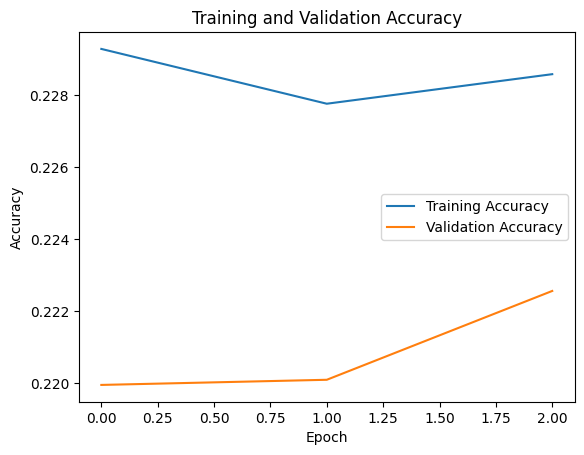

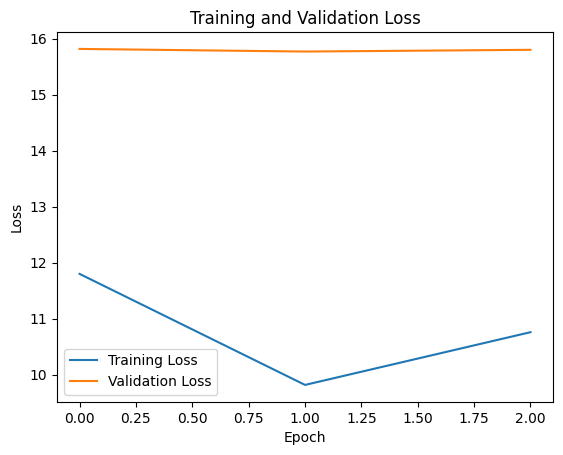

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy_cer']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy_cer']
val_loss = history.history['val_loss']

# Vẽ biểu đồ Accuracy
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Vẽ biểu đồ Loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from nltk import ngrams

NGRAM=5
MAXLEN=39

list_ngrams=[]
for p in phrases:
  list_p=p.split()
  if(len(list_p) >= NGRAM):
    for ngr in ngrams(p.split(),NGRAM):
      if len(' '.join(ngr)) <= MAXLEN:
        list_ngrams.append(' '.join(ngr))
  elif len(' '.join(list_p)) <= MAXLEN:
    list_ngrams.append(' '.join(list_p))

list_ngrams = list((list_ngrams))
print(len(list_ngrams))
list_ngrams[:10]

201222


['Và thế là chúng tôi',
 'thế là chúng tôi ngồi',
 'là chúng tôi ngồi đợi',
 'chúng tôi ngồi đợi cậu',
 'tôi ngồi đợi cậu ấy',
 'ngồi đợi cậu ấy đến',
 'Chóng mặt kịch phát tư',
 'mặt kịch phát tư thế',
 'kịch phát tư thế lành',
 'phát tư thế lành tính']

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
def encoder_data(text):
  x=np.zeros((MAXLEN, len(alphabet)))
  for i, c in enumerate(text[:MAXLEN]):
    if c not in alphabet:
      continue
    x[i,alphabet.index(c)] = 1
  if i < MAXLEN -1:
    for j in range(i+1,MAXLEN):
      x[j,0] =1
  return x

def decoder_data(x):
  x=x.argmax(axis=-1)
  return ''.join(alphabet[i] for i in x)

In [ ]:
encoder = LSTM(256,input_shape =(MAXLEN,len(alphabet)),return_sequences=True)

In [ ]:
decoder= Bidirectional(LSTM(256,return_sequences=True,dropout=0.2))

In [ ]:
models = Sequential()
models.add(encoder)
models.add(decoder)
models.add(TimeDistributed(Dense(256)))
models.add(Activation('relu'))
models.add(TimeDistributed(Dense(len(alphabet))))
models.add(Activation('softmax'))

models.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

models.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 39, 256)           457728    
                                                                 
 bidirectional (Bidirection  (None, 39, 512)           1050624   
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 39, 256)           131328    
 ributed)                                                        
                                                                 
 activation (Activation)     (None, 39, 256)           0         
                                                                 
 time_distributed_1 (TimeDi  (None, 39, 190)           48830     
 stributed)                                                      
                                                      

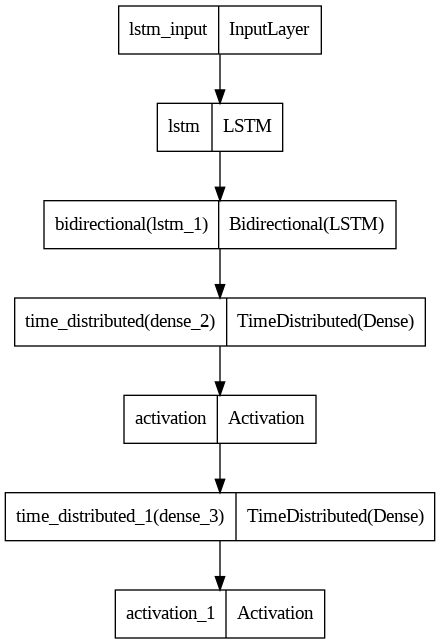

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(models,to_file='model.png')

In [ ]:
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(list_ngrams,test_size=0.2,random_state=42)

In [ ]:
BATCH_SIZE = 512
EPOCHS =2

In [ ]:
def generate_data(data,batch_size):
  current_index = 0
  while True:
    x,y=[],[]
    for i in range(batch_size):
      y.append(encoder_data(data[current_index]))
      x.append(encoder_data(add_noise(data[current_index])))
      current_index +=1
      if current_index > len(data) -1:
        current_index =0
    yield(np.array(x),np.array(y))

In [ ]:
train_generator = generate_data(train_data,batch_size=BATCH_SIZE)
validation_generator = generate_data(valid_data,batch_size=BATCH_SIZE)

In [ ]:
2**9

512

In [ ]:
len(train_data)//BATCH_SIZE

314

In [ ]:
H=models.fit(train_generator,epochs=EPOCHS,steps_per_epoch = len(train_data)//BATCH_SIZE,validation_data=validation_generator,validation_steps=len(valid_data)//BATCH_SIZE)


Epoch 1/2
314/314 [==============================] - 1842s 6s/step - loss: 1.5794 - accuracy: 0.6608 - val_loss: 0.5729 - val_accuracy: 0.9013
Epoch 2/2
314/314 [==============================] - 1813s 6s/step - loss: 0.3765 - accuracy: 0.9288 - val_loss: 0.2861 - val_accuracy: 0.9354


In [ ]:
models.save('model_{0:.4f}.h5'.format(H.history['val_accuracy'][-1]))

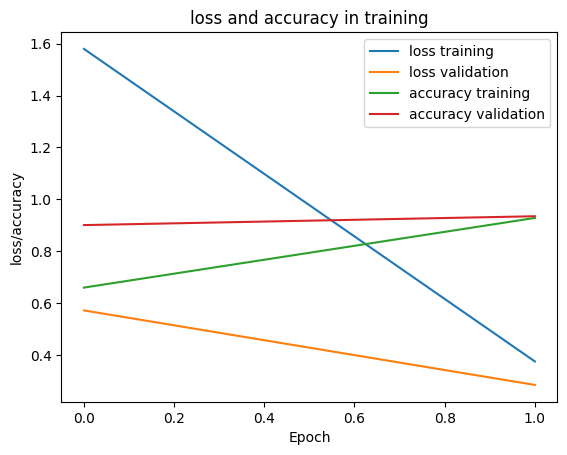

In [ ]:
import matplotlib.pyplot as plt

# plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,EPOCHS),H.history['loss'],label='loss training')
plt.plot(np.arange(0,EPOCHS),H.history['val_loss'],label='loss validation')
plt.plot(np.arange(0,EPOCHS),H.history['accuracy'],label='accuracy training')
plt.plot(np.arange(0,EPOCHS),H.history['val_accuracy'],label='accuracy validation')
plt.title('loss and accuracy in training')
plt.xlabel('Epoch')
plt.ylabel('loss/accuracy')
plt.legend()
plt.show()

In [ ]:
from collections import Counter
from keras.models import load_model
import nltk
import numpy as np
import re

model =load_model('model_0.9354.h5'.format(H.history['val_accuracy'][-1]))

NGRAM=5
MAXLEN=39


In [ ]:
print(len(alphabet))


190


In [ ]:
def encoder_data(text):
  x=np.zeros((MAXLEN,len(alphabet)))
  for i,c in enumerate(text[:MAXLEN]):
    if c not in alphabet:
      continue
    x[i,alphabet.index(c)] =1
  if i < MAXLEN -1:
    for j in range(i+1,MAXLEN):
      x[j,0] =1
  return x
def decoder_data(x):
  x=x.argmax(axis=-1)
  return ''.join(alphabet[i] for i in x)

In [ ]:
print(encoder_data('Tôi là ai tên gì').shape)
print(decoder_data(encoder_data('Tôi là ai tên gì')))

(39, 190)
Tôi là ai tên gì                       


In [ ]:
def nltk_ngrams(sentence,n,maxlen):
  list_ngrams=[]
  list_words=sentence.split()
  num_words=len(list_words)

  if (num_words >=n):
    for ngram in nltk.ngrams(list_words,n):
      if len(' '.join(ngram)) <= maxlen:
        list_ngrams.append(ngram)
  else:
    list_ngrams.append(tuple(list_words))

  return list_ngrams

In [ ]:
nltk_ngrams('xuwr ný ngoon ngữ tuwj nhêin',NGRAM,MAXLEN)

[('xuwr', 'ný', 'ngoon', 'ngữ', 'tuwj'),
 ('ný', 'ngoon', 'ngữ', 'tuwj', 'nhêin')]

In [ ]:
def guess(ngram):
  text= ' '.join(ngram)
  preds = model.predict(np.array([encoder_data(text)]))
  return decoder_data(preds[0]).strip('\x00')

In [ ]:
guess(('xuwr','ný','ngoon','ngữ','tuwj'))

1/1 [==============================] - 2s 2s/step


'xu r ný ngoonnngg tu'

In [ ]:
def add_punctuation(text,corrected_text):
  list_punctuation ={}
  for (i,word) in enumerate(text.split()):
    if word[0] not in alphabet or word[-1] not in alphabet:
      start_punc = ''
      for c in word:
        if c in alphabet:
          break
        start_punc += c

      end_punc=''
      for c in word[::-1]:
        if c in alphabet:
          break
        end_punc +=c
      end_punc = end_punc[::-1]

      list_punctuation[i]=[start_punc,end_punc]

  result=''
  for (i,word) in enumerate(corrected_text.split()):
    if i in list_punctuation:
      result += (list_punctuation[i][0] + word + list_punctuation[i][1]) + ' '
    else:
      result+= word + ' '

  return result.strip()


In [ ]:
def correct(text):
  new_text = re.sub(r'[^' + ''.join(alphabet)+']','',text)

  ngrams = list(nltk_ngrams(new_text,NGRAM,MAXLEN))

  guessed_ngrams= list(guess(ngram) for ngram in ngrams)
  candidates= [Counter() for _ in range(len(guessed_ngrams)+ NGRAM -1)]

  for nid, ngram in (enumerate(guessed_ngrams)):
    for wid, word in (enumerate(re.split('\s',ngram))):
      candidates[nid + wid].update([word])

  corrected_text = ' '.join(c.most_common(1)[0][0] for c in candidates if c)
  return add_punctuation(text,corrected_text)

In [ ]:
text="Hôm qua, tôi và bạn bè đã đi chời ở công viên. Chúng tôi đã có một ngày rât vui vẻ và thich thú. Chúng tôi chơi các trò chơi như đu quay"

In [ ]:
correct(text)

1/1 [==============================] - 0s 48ms/step


'Hôm qua, tôi và bạn bè đã đi chời ở công viên. Chúng tôi đã có một ngày rât vui vẻ và thich thú. Chúng tôi chơi các trò chơi như đu quay'

In [ ]:
text=input()

result = correct(text)
print(result)

text = re.sub(r'[^' + ''.join(alphabet) +']','',text)
list_text=text.split()

result= re.sub(r'[^' + ''.join(alphabet) +']','',result)
list_result=result.split()

corrected_word = [(list_text[i],list_result[i]) for i in range(len(list_text)) if list_text[i] != list_result[i]]
corrected_word

TypeError: 'numpy.ndarray' object is not callable